In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklego.datasets import load_chicken
from sklego.preprocessing import ColumnSelector

# READING DATASET

In [2]:
df = load_chicken(as_frame=True)
df.sample(10)

,weight,time,chick,diet
104,100,18,9,1
337,151,18,30,2
331,72,6,30,2
163,227,16,14,1
268,40,0,25,2
17,103,10,2,1
501,118,10,44,4
299,123,14,27,2
275,164,14,25,2
137,119,12,12,1


In [11]:
def plot_model(model):
    df = load_chicken(as_frame=True)
    model.fit(df[['diet', 'time']], df['weight'])
    metric_df = df[['diet', 'time', 'weight']].assign(pred=lambda d: model.predict(d[['diet', 'time']]))
    metric = mean_absolute_error(metric_df['weight'], metric_df['pred'])
    plt.figure(figsize=(12, 4))
    # plt.scatter(df['time'], df['weight'])
    for i in [1, 2, 3, 4]:
        pltr = metric_df[['time', 'diet', 'pred']].drop_duplicates().loc[lambda d: d['diet'] == i]
        plt.plot(pltr['time'], pltr['pred'], color='.rbgy'[i])
    plt.title(f"linear model per group, MAE: {np.round(metric, 2)}");

# FEATURE PIPELINE


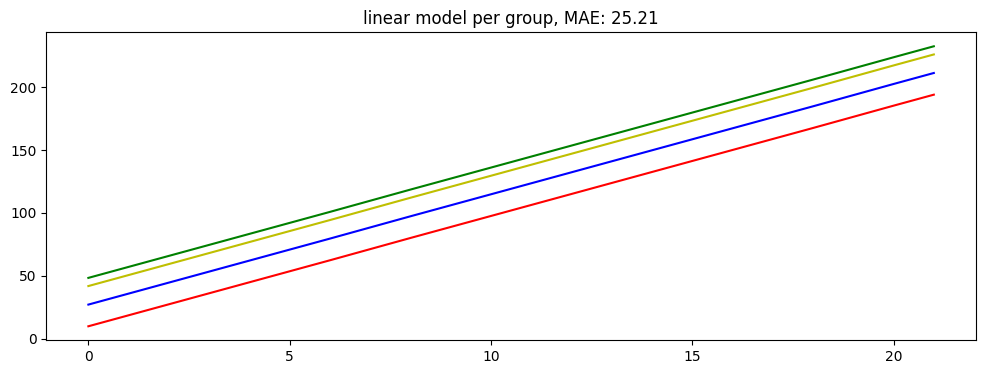

In [12]:
feature_pipeline = Pipeline([
    ("datagrab", FeatureUnion([
        ("discrete", Pipeline([
            ("grab", ColumnSelector("diet")),
            ("encode", OneHotEncoder(categories="auto", sparse=False))
        ])),
        ("continuous", Pipeline([
            ("grab", ColumnSelector("time")),
            ("standardize", StandardScaler())
        ]))
    ]))
])

pipe = Pipeline([
    ("transform", feature_pipeline),
    ("model", LinearRegression())
])

plot_model(pipe)

In [ ]:
pip install sklego

Note: you may need to restart the kernel to use updated packages.


(<matplotlib.collections.PathCollection at 0x2931de2c760>,)

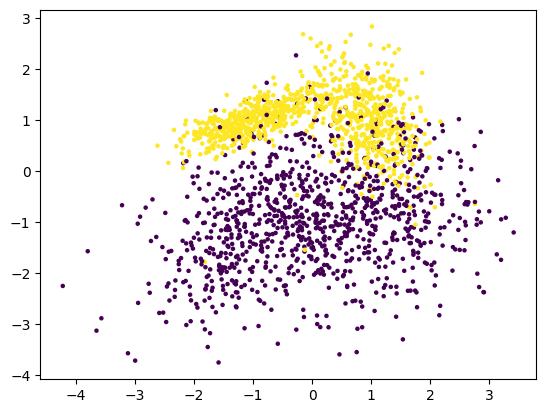

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,make_scorer,classification_report,f1_score

from sklego.meta import Thresholder
X,y = make_classification(n_samples=2000,n_features=2,
                          n_redundant=0,random_state=21)
plt.scatter(X[:,0],X[:,1],c=y,s=5),

Text(0.5, 1.0, 'Threshold 0.9')

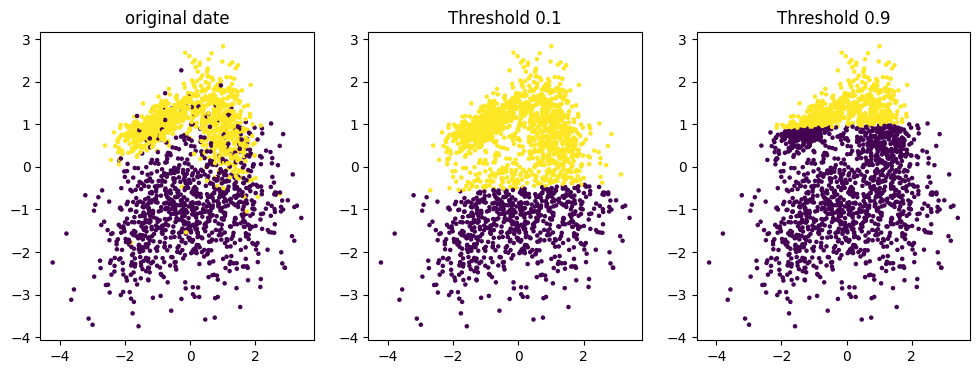

In [ ]:
m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X,y)
m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X,y)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.title("original date")
plt.subplot(132)
plt.scatter(X[:,0],X[:,1],c=m1.predict(X),s=5)
plt.title("Threshold 0.1")
plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=m2.predict(X),s=5)
plt.title("Threshold 0.9")

In [ ]:
pipe = Pipeline([
    ("model",Thresholder(LogisticRegression(solver='lbfgs'),threshold=0.1))
])

mod = GridSearchCV(estimator=pipe,
                 param_grid={"model__threshold":np.linspace(0.1,0.9,50)},
                 scoring={"precision": make_scorer(precision_score),
                          "recall": make_scorer(recall_score),
                          "accuracy":make_scorer(accuracy_score)},
                refit="precision",
                cv=5)
mod.fit(X, y);

In [ ]:
mod.predict(X)

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
df_results = pd.DataFrame(mod.cv_results_)

[]

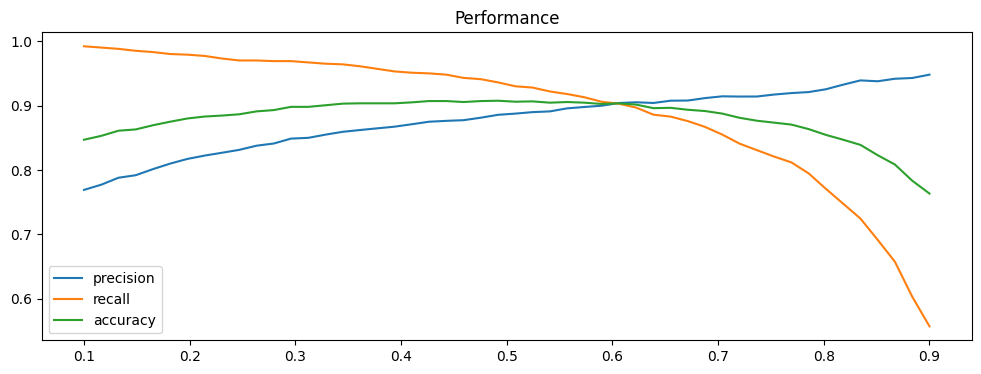

In [ ]:
#plotting the results
plt.figure(figsize=(12,4))
plt.plot(df_results["param_model__threshold"],df_results["mean_test_precision"], label="precision")
plt.plot(df_results["param_model__threshold"],df_results["mean_test_recall"],label="recall")
plt.plot(df_results["param_model__threshold"],df_results["mean_test_accuracy"],label="accuracy")
plt.legend()
plt.title("Performance")
plt.plot()
